In [15]:
from utilities import *
from wls import *

<class 'numpy.ndarray'>
Image shape: (530, 800, 3)
Data type: uint8


c:\Users\ninor\Documents\cours\n7\2A\TI\epd\src\utilities.py:18: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)
c:\Users\ninor\Documents\cours\n7\2A\TI\epd\src\utilities.py:19: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


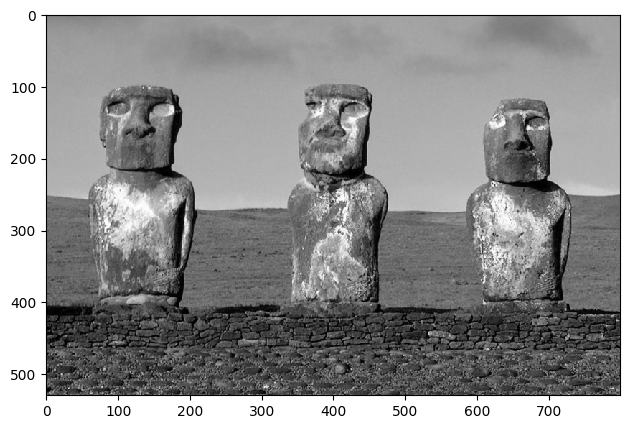

[[5.80111799 5.78074834 5.770433   ... 6.07133251 6.05509253 6.06324004]
 [5.80111799 5.770433   5.770433   ... 6.06324004 6.04688924 6.04688924]
 [5.83104111 5.80111799 5.79097618 ... 6.04688924 6.04688924 6.06324004]
 ...
 [4.74215235 5.19865717 5.3541719  ... 5.16503368 5.50505123 5.46572277]
 [5.90738043 5.65073548 5.63924237 ... 5.78074834 5.45232533 5.3541719 ]
 [5.82114908 5.90738043 5.58008087 ... 5.61592343 5.58008087 5.68457377]]


In [18]:
IMAGE_PATH = "../data/image2.png"

image = load_image(IMAGE_PATH, gray=False, verbose=True)
print(smoothness_matrixes(image, 3, 3))